# AIM: using certain factors we need to classify whether or not a customer subscribes to the term deposit upon getting a call from a bank’s representative.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Dataset for assignment W1.xlsx')

In [ ]:
df.head()

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.iloc[:6,:10]

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon


In [ ]:
df.iloc[:6,10:]

,duration,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41188 non-null  int64  
 1   Job           41188 non-null  object 
 2   Marital       41188 non-null  object 
 3   Education     41188 non-null  object 
 4   Default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   Loan          41188 non-null  object 
 7   Contact       41188 non-null  object 
 8   Month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

In [ ]:
df.isna().sum()

Age             0
Job             0
Marital         0
Education       0
Default         0
housing         0
Loan            0
Contact         0
Month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
y               0
dtype: int64

In [ ]:
df['Job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
df['Default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [ ]:
df['Job'].value_counts()

Job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [ ]:
df['Education'].value_counts()

Education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [ ]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [ ]:
df['Loan'].value_counts()

Loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [ ]:
df['Contact'].value_counts()

Contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [ ]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

# By the above information we have to conclude that It is imbalanced dataset because It have the more number of no's and the less number of yes's

In [ ]:
#Count of the jobs
import plotly.express as px
job_counts=df['Job'].value_counts().reset_index()
job_counts.columns=['Job','Count']
fig=px.bar(data_frame=job_counts,x='Job',y='Count')
fig.show()

In [ ]:
df.groupby('Job')['y'].value_counts()

Job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: count, dtype: int64

In [ ]:
#This is the count of jobs with how many of subscribe and how many not subscribe to termdeposit in each job
y_job_counts=df.groupby('Job')['y'].value_counts().reset_index()
y_job_counts.columns=['Job','y','Count']
j_fig=px.bar(data_frame=y_job_counts,x='Job',y='Count',color='y',pattern_shape='y',pattern_shape_sequence=['/','-'])
j_fig.show()

In [ ]:
#This is the counts of How many of subscribes and not subscribe in the each month
y_counts=df.groupby('Month')['y'].value_counts().reset_index()
y_counts.columns=['Month','y','Count']
fig1=px.bar(data_frame=y_counts,x='Month',y='Count',color='y',pattern_shape='y',pattern_shape_sequence=['x','+'])
fig1.show()

In [ ]:
# This counts of Marital with how many of subscribed or not subscribed to the term deposit

m_counts=df.groupby('Marital')['y'].value_counts().reset_index()
m_counts.columns=['Marital','y','Count']
m_fig=px.bar(data_frame=m_counts,x='Marital',y='Count',color='y',pattern_shape='y',pattern_shape_sequence=['\\','.'])
m_fig.show()

In [ ]:
df['Education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
df['Default'].value_counts()

Default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [ ]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
df['Month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
c_df=df.copy()

In [ ]:
#ordinal encoding for the columns
# Education,Month,day_of_week
#Nominal Encoding
#Job, Marital, Default, housing,Loan, Contact,poutcome,y

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in ['Job', 'Marital', 'Default', 'housing','Loan', 'Contact','poutcome','y']:
  c_df[col]=le.fit_transform(c_df[col])

In [ ]:
c_df.head()

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,3,1,basic.4y,0,0,0,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,high.school,1,0,0,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,high.school,0,2,0,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,basic.6y,0,0,0,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,high.school,0,0,2,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#['basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown', 'university.degree','illiterate']

d1={'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,'professional.course':5,'university.degree':6,'unknown':7}
d2={'may':5,'jun':6,'jul':7,'aug':8,'oct':10,'nov':11,'dec':12,'mar':3,'apr':4,'sep':9}
d3={'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}


In [ ]:
c_df['Education']=c_df['Education'].map(d1)
c_df['Month']=c_df['Month'].map(d2)
c_df['day_of_week']=c_df['day_of_week'].map(d3)

In [ ]:
c_df.head()

,Age,Job,Marital,Education,Default,housing,Loan,Contact,Month,day_of_week,...,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed,y
0,56,3,1,1,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,4,1,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4,0,2,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4,0,0,2,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


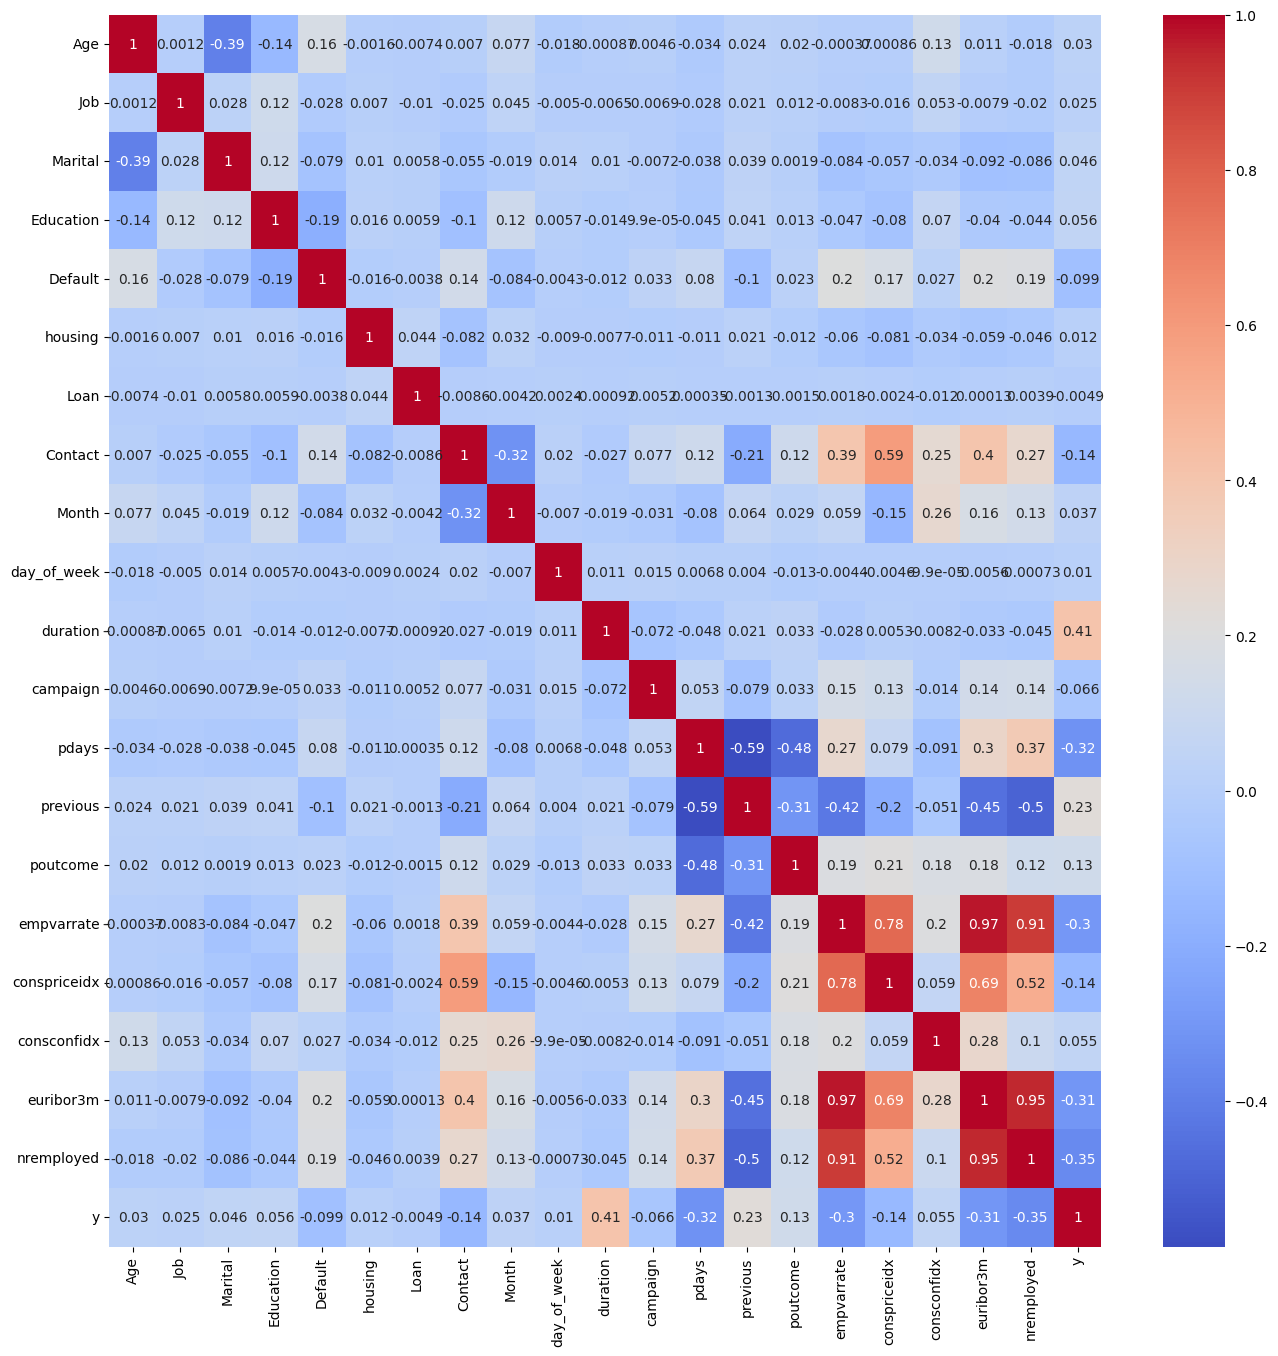

In [ ]:
plt.figure(figsize=(16,16))
correlation_matrix=c_df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
c_df.shape

(41188, 21)

In [ ]:
#Here we have to calculate the VIF for checking the multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data['Features']=c_df.columns
vif_data['VIF']=[variance_inflation_factor(c_df.values,i) for i in range(c_df.shape[1])]

In [ ]:
vif_data

,Features,VIF
0,Age,19.807647
1,Job,2.115546
2,Marital,5.654132
3,Education,8.035529
4,Default,1.412956
5,housing,2.206734
6,Loan,1.207719
7,Contact,3.878039
8,Month,22.428969
9,day_of_week,5.472697


In [ ]:
# we have to drop the columns which have the VIF value is greater than 10

# those columns are Age,Month,pdays,poutcome,empvarrate,conspriceidx,consconfidx,euribor3m,nremployed

c_df.drop(columns=['Age','Month','pdays','poutcome','empvarrate','conspriceidx','consconfidx','euribor3m','nremployed'],inplace=True)

In [ ]:
c_df.head()

,Job,Marital,Education,Default,housing,Loan,Contact,day_of_week,duration,campaign,previous,y
0,3,1,1,0,0,0,1,1,261,1,0,0
1,7,1,4,1,0,0,1,1,149,1,0,0
2,7,1,4,0,2,0,1,1,226,1,0,0
3,0,1,2,0,0,0,1,1,151,1,0,0
4,7,1,4,0,0,2,1,1,307,1,0,0


In [ ]:
#Splitting the data set
from sklearn.model_selection import train_test_split

X=c_df.drop(columns=['y'])
y=c_df['y']

In [ ]:
X.head(3)

,Job,Marital,Education,Default,housing,Loan,Contact,day_of_week,duration,campaign,previous
0,3,1,1,0,0,0,1,1,261,1,0
1,7,1,4,1,0,0,1,1,149,1,0
2,7,1,4,0,2,0,1,1,226,1,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (28831, 11)
y_train shape (28831,)
X_test shape (12357, 11)
y_test shape (12357,)


In [ ]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train

array([[-1.03362777, -0.28835206,  1.00691582, ..., -0.69511644,
         0.15413935,  1.67379958],
       [ 1.47115571,  1.3510639 ,  1.00691582, ..., -0.94491621,
         0.51747772, -0.34914386],
       [-0.7553185 , -0.28835206, -1.34310462, ...,  0.07349826,
        -0.20919902, -0.34914386],
       ...,
       [-1.03362777, -0.28835206, -0.1680944 , ..., -0.24547684,
        -0.57253738,  1.67379958],
       [ 0.07960933, -0.28835206,  1.00691582, ...,  0.14267359,
        -0.20919902, -0.34914386],
       [-1.03362777,  1.3510639 ,  1.00691582, ...,  0.28871038,
        -0.20919902, -0.34914386]])

In [ ]:
X_test

array([[ 1.45946436, -0.27295192, -0.15658612, ...,  0.43471455,
        -0.55091472,  1.66495729],
       [ 2.01538437, -0.27295192,  1.6056495 , ...,  0.10019511,
        -0.19514502, -0.35031132],
       [-0.76421569, -0.27295192, -0.743998  , ..., -0.8061192 ,
        -0.55091472,  1.66495729],
       ...,
       [-0.76421569,  1.37637173, -0.15658612, ..., -0.03205677,
        -0.19514502, -0.35031132],
       [ 1.45946436, -1.92227556,  0.43082575, ..., -0.81389873,
         0.16062468, -0.35031132],
       [ 1.45946436, -0.27295192,  1.01823763, ..., -0.1487496 ,
        -0.19514502,  1.66495729]])

In [ ]:
X.columns

Index(['Job', 'Marital', 'Education', 'Default', 'housing', 'Loan', 'Contact',
       'day_of_week', 'duration', 'campaign', 'previous'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data['Features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

print(vif_data)

       Features       VIF
0           Job  2.051968
1       Marital  4.148044
2     Education  5.608217
3       Default  1.272928
4       housing  2.064660
5          Loan  1.198503
6       Contact  1.607886
7   day_of_week  4.359553
8      duration  1.887206
9      campaign  1.811501
10     previous  1.172664


In [ ]:
#RFE is the Recursive Feature Elimination it used to select the important fetures that are impact on the predictions
#Whereever the True that is the important feature.

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator=RandomForestClassifier()
rfe= RFE(estimator,n_features_to_select=10)
rfe.fit(X,y)

print(X.columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['Job', 'Marital', 'Education', 'Default', 'housing', 'Loan', 'Contact',
       'day_of_week', 'duration', 'campaign', 'previous'],
      dtype='object')
[ True  True  True False  True  True  True  True  True  True  True]
[1 1 1 2 1 1 1 1 1 1 1]


In [ ]:
# LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier, AdaBoostClassifier,GaussianNB,XGBClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
models={'Logistic Regression':LogisticRegression(max_iter=20000),
        'RandomForest Classifier':RandomForestClassifier(),
        'K-Nearist neighbor Classifier':KNeighborsClassifier(n_neighbors=3),
        'AdaBoostClassifier':AdaBoostClassifier(),
        'Decision Tree':DecisionTreeClassifier(),
        'Support Vectoe Machine':SVC()}


for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train.values.ravel())
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)

  # Training Performance
  training_Accuracy=accuracy_score(y_train,y_train_pred)
  training_precision=precision_score(y_train,y_train_pred,average='weighted')
  training_recall=recall_score(y_train,y_train_pred,average='weighted')
  training_f1_score=f1_score(y_train,y_train_pred,average='weighted')

  #Testing performance
  test_Accuracy=accuracy_score(y_test,y_test_pred)
  test_precision=precision_score(y_test,y_test_pred,average='weighted')
  test_recall=recall_score(y_test,y_test_pred,average='weighted')
  test_f1_score=f1_score(y_test,y_test_pred,average='weighted')


  print(list(models.keys())[i])
  print('TRAINING PERFORMANCE OF THE TRAINING SET')
  print('-->Accuracy Score :',training_Accuracy)
  print('-->Precision Score :',training_precision)
  print('-->Recall Score :',training_recall)
  print('-->F1 Score :',training_f1_score)

  print('------------------------------------------------')

  print('TESTING PERFORMANCE OF THE TESTING SET')
  print('-->Accuracy Score :',test_Accuracy)
  print('-->Precision Score :',test_precision)
  print('-->Recall Score :',test_recall)
  print('-->F1_score :',test_f1_score)

  print('='*50)
  print('\n')

Logistic Regression
TRAINING PERFORMANCE OF THE TRAINING SET
-->Accuracy Score : 0.8962228157191912
-->Precision Score : 0.8750281290897619
-->Recall Score : 0.8962228157191912
-->F1 Score : 0.8752490461501787
------------------------------------------------
TESTING PERFORMANCE OF THE TESTING SET
-->Accuracy Score : 0.8996520190984867
-->Precision Score : 0.8808381787061842
-->Recall Score : 0.8996520190984867
-->F1_score : 0.8791904451749858


RandomForest Classifier
TRAINING PERFORMANCE OF THE TRAINING SET
-->Accuracy Score : 0.9996531511220561
-->Precision Score : 0.9996531631565778
-->Recall Score : 0.9996531511220561
-->F1 Score : 0.9996529645938992
------------------------------------------------
TESTING PERFORMANCE OF THE TESTING SET
-->Accuracy Score : 0.8911548110382779
-->Precision Score : 0.8723968267013547
-->Recall Score : 0.8911548110382779
-->F1_score : 0.8776997403165702


K-Nearist neighbor Classifier
TRAINING PERFORMANCE OF THE TRAINING SET
-->Accuracy Score : 0.92480

#**SMOTE (Synthatic Monority Over-Sampling Technique)**

In [ ]:
%%capture
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

X_smote,y_smote=smote.fit_resample(X,y)

In [ ]:
X_smote.head()

,Job,Marital,Education,Default,housing,Loan,Contact,day_of_week,duration,campaign,previous
0,3,1,1,0,0,0,1,1,261,1,0
1,7,1,4,1,0,0,1,1,149,1,0
2,7,1,4,0,2,0,1,1,226,1,0
3,0,1,2,0,0,0,1,1,151,1,0
4,7,1,4,0,0,2,1,1,307,1,0


In [ ]:
X_smote.shape

(73096, 11)

In [ ]:
y_smote.value_counts()

y
0    36548
1    36548
Name: count, dtype: int64

In [ ]:
x_train,x_test,Y_train,Y_test=train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

In [ ]:
s_models={'Logistic Regression':LogisticRegression(max_iter=20000),
        'Random Forest':RandomForestClassifier(),
        'DecisionTree':DecisionTreeClassifier(),
        'K-Nearist neighbor Classifier':KNeighborsClassifier(n_neighbors=3),
        'Support vector machine':SVC(),
        'AdaBoost Classfier':AdaBoostClassifier(),
        'XGBoost':XGBClassifier()}


for i in range(len(list(s_models))):
  s_model=list(s_models.values())[i]
  s_model.fit(x_train,Y_train.values.ravel())

  #Prediction
  s_train_pred=s_model.predict(x_train)
  s_test_pred=s_model.predict(x_test)

  #Training Performance
  s_train_accuracy=accuracy_score(Y_train,s_train_pred)
  s_train_precision=precision_score(Y_train,s_train_pred,average='weighted')
  s_train_recall=recall_score(Y_train,s_train_pred,average='weighted')
  s_train_f1_score=f1_score(Y_train,s_train_pred,average='weighted')

  #Testing Performance
  s_test_accuracy=accuracy_score(Y_test,s_test_pred)
  s_test_precision_score=precision_score(Y_test,s_test_pred,average='weighted')
  s_test_recall_score=recall_score(Y_test,s_test_pred,average='weighted')
  s_test_f1_score=f1_score(Y_test,s_test_pred,average='weighted')

  print(list(s_models.keys())[i])
  print('TRAINING PERFORMANCE OF THE TRAINING SET')
  print('-->Accuracy Score :',s_train_accuracy)
  print('-->Precision Score :',s_train_precision)
  print('-->recall score :',s_train_recall)
  print('-->f1_score :',s_train_f1_score)

  print('---------------------------------------------')

  print('TESTING PERFORMANCE OF THE TESTING SET')
  print('-->Accuracy Score :',s_test_accuracy)
  print('-->Precision Score :',s_test_precision_score)
  print('-->recall score :',s_test_recall_score)
  print('-->f1_score :',s_test_f1_score)

  print('='*50)
  print('\n')


Logistic Regression
TRAINING PERFORMANCE OF THE TRAINING SET
-->Accuracy Score : 0.8210956280415111
-->Precision Score : 0.8214731429893197
-->recall score : 0.8210956280415111
-->f1_score : 0.82103680688294
---------------------------------------------
TESTING PERFORMANCE OF THE TESTING SET
-->Accuracy Score : 0.8217428975329473
-->Precision Score : 0.8222202033578045
-->recall score : 0.8217428975329473
-->f1_score : 0.821692609654874


Random Forest
TRAINING PERFORMANCE OF THE TRAINING SET
-->Accuracy Score : 0.998905544589286
-->Precision Score : 0.9989063229741775
-->recall score : 0.998905544589286
-->f1_score : 0.9989055430776449
---------------------------------------------
TESTING PERFORMANCE OF THE TESTING SET
-->Accuracy Score : 0.9026859409913813
-->Precision Score : 0.9036971652848106
-->recall score : 0.9026859409913813
-->f1_score : 0.9026349478851428


DecisionTree
TRAINING PERFORMANCE OF THE TRAINING SET
-->Accuracy Score : 0.998925088435906
-->Precision Score : 0.9989